<a href="https://colab.research.google.com/github/Nathan2605/logistic-regression-project-tutorial/blob/main/Proyecto_First_ML_algorithm_NH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tableone

In [ ]:
import numpy as np
import pandas as pd
from tableone import TableOne, load_dataset
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

## Paso 1: Carga del conjunto de datos

- age. Edad del cliente (numérico)
- job. Tipo de trabajo (categórico)
- marital. Estado civil (categórico)
- education. Nivel de educación (categórico)
- default. ¿Tiene crédito actualmente? (categórico)
- housing. ¿Tiene un préstamo de vivienda? (categórico)
- loan. ¿Tiene un préstamo personal? (categórico)
- contact. Tipo de comunicación de contacto (categórico)
- month. Último mes en el que se le ha contactado (categórico)
- day_of_week. Último día en el que se le ha contactado (categórico)
- duration. Duración del contacto previo en segundos (numérico)
- campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
- pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
- previous. Número de contactos realizados durante la campaña anterior al - cliente (numérico)
- poutcome. Resultado de la campaña de marketing anterior (categórico)
- emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
- cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
- cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
- euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
- nr.employed. Número de empleados. Indicador trimestral (numérico)
- y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)

In [ ]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'

In [ ]:
df = pd.read_csv(url, sep=';')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Paso 2: Realiza un EDA completo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
def is_binary(df_, nums):
    df = df_.copy()
    variables = []
    for var in nums:
        flag = True
        unique = df_[var].unique()
        for value in unique:
            if value not in [0, 1, np.nan, 0.0, 1.0]:
                flag = False
        if flag == True:
            variables.append(var)
    return variables

def breakdown_vars(df, off_binary=False):
    """
    This function allow us categorize accodign to numerical or not
    """
    binaries = is_binary(df, df.columns)
    categorial = []
    nonormal = []
    normal = []
    for t in df.columns:
        if off_binary == False:
          if (df[t].dtypes.name=="object" or df[t].dtypes.name=='category') and  t not in binaries:
            categorial.append(t)
        else:
           if (df[t].dtypes.name=="object" or df[t].dtypes.name=='category'):
            categorial.append(t)
        if (df[t].dtypes=="int64" or df[t].dtypes=="float64") and t not in binaries:
                n,p = stats.shapiro(df[t])
                if p<0.05:
                    nonormal.append(t)
                else:
                    normal.append(t)
    if off_binary == False:
      return categorial, binaries, nonormal, normal
    else:
      return categorial, nonormal, normal

In [ ]:
#categorizamos las variables en categoricas, normal y nonormal
cat, nonormal , normal = breakdown_vars(df, off_binary=True)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41188.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#veamos las categoricas
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
#vamos las no normales (no hay variables normales)
nonormal

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
is_binary(df,nonormal) #no hay binarias en las variables numericas

[]

In [ ]:
#contemos los Nan
for col in df.columns:
  print(col, df[col].isnull().sum()) #no hay Nan

age 0
job 0
marital 0
education 0
default 0
housing 0
loan 0
contact 0
month 0
day_of_week 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
emp.var.rate 0
cons.price.idx 0
cons.conf.idx 0
euribor3m 0
nr.employed 0
y 0


**VARIABLES CATEGORICAS**

In [ ]:
#checamos los unique de las categoricas
for col in cat:
  print(col, df[col].unique()) #todas las categoricas tienen 'unknown'

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


In [ ]:
#reemplazar 'unknown' por un Nan
df.replace('unknown', np.nan, inplace=True)
df.replace('nonexistent', np.nan, inplace=True)

In [ ]:
#volvemos a checar los Nan, pero porcentuales
for col in df.columns:
  print(col, round(df[col].isnull().sum() / len(df[col]),2)) #no hay Nan

age 0.0
job 0.01
marital 0.0
education 0.04
default 0.21
housing 0.02
loan 0.02
contact 0.0
month 0.0
day_of_week 0.0
duration 0.0
campaign 0.0
pdays 0.0
previous 0.0
poutcome 0.86
emp.var.rate 0.0
cons.price.idx 0.0
cons.conf.idx 0.0
euribor3m 0.0
nr.employed 0.0
y 0.0


- "poutcome" muchos Nan (86%)
- "default" muchos Nan (21%)

In [ ]:
#eliminamos 'poutcome'
df.drop('poutcome', axis=1, inplace=True)
cat.remove('poutcome')

In [ ]:
#vamos a factorizar todas las categoricas
for col in cat:
  df[col] = pd.factorize(df[col])[0]  #-1 son Nan

In [ ]:
df[cat]

,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,-1,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0
3,2,0,2,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41183,5,0,4,0,1,0,1,5,4,1
41184,3,0,4,0,0,0,1,5,4,0
41185,5,0,5,0,1,0,1,5,4,0
41186,4,0,4,0,0,0,1,5,4,1


**VARIABLES NUMERICAS**

In [ ]:
normal

[]

In [ ]:
nonormal

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
#chequemos medias, desviaciones, min, max, etc.
round(df[nonormal].describe(),2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


<Axes: >

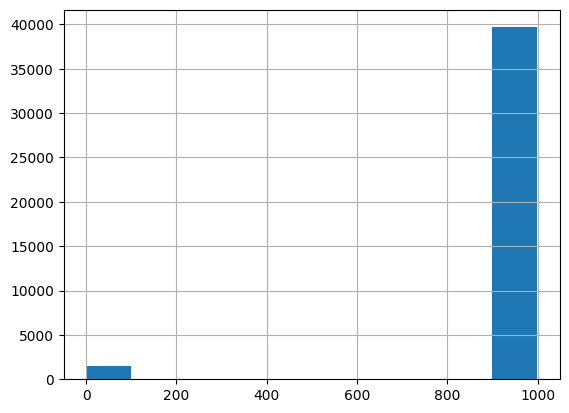

In [ ]:
df['pdays'].hist() #interesante..

In [ ]:
df.corr()['y']

,y
age,0.030399
job,0.054175
marital,0.025185
education,0.026145
default,0.099199
housing,0.011379
loan,-0.003142
contact,0.144773
month,0.183471
day_of_week,0.010051


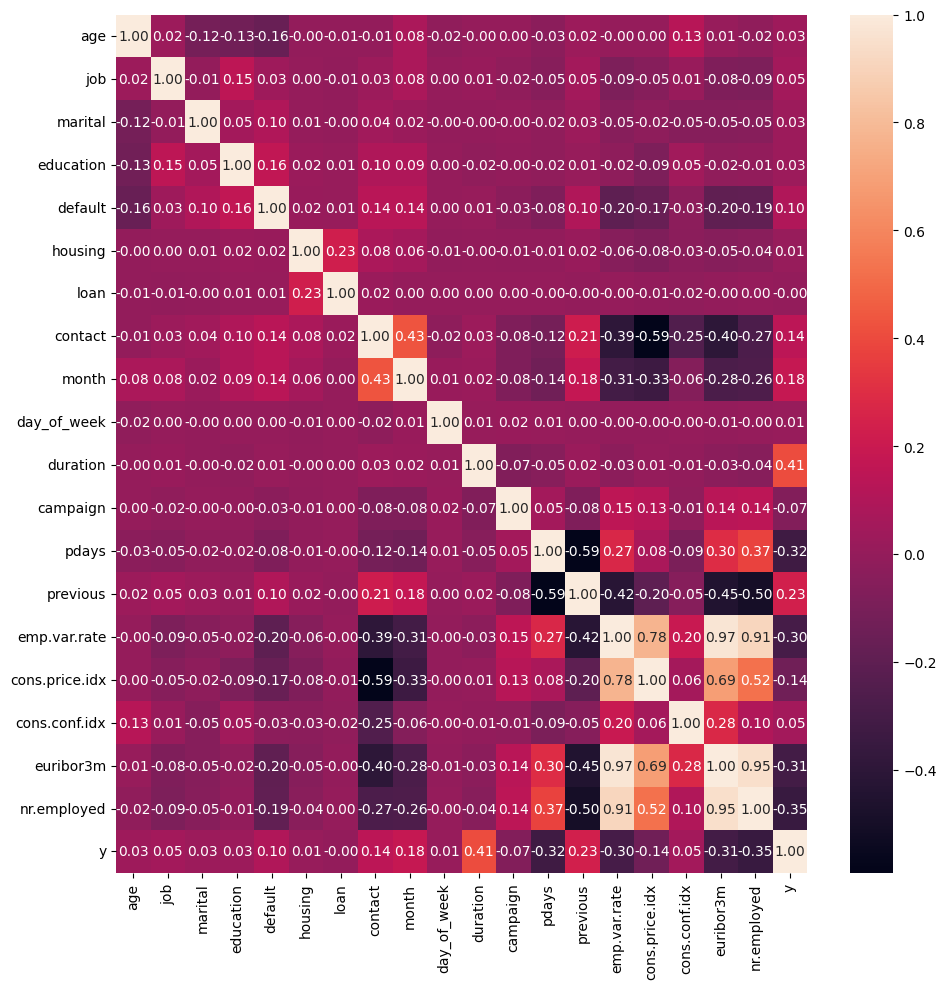

In [ ]:
#hacemos un mapa de correlaciones
fig, axes = plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()                 #se ve bonito, hay colinealidad

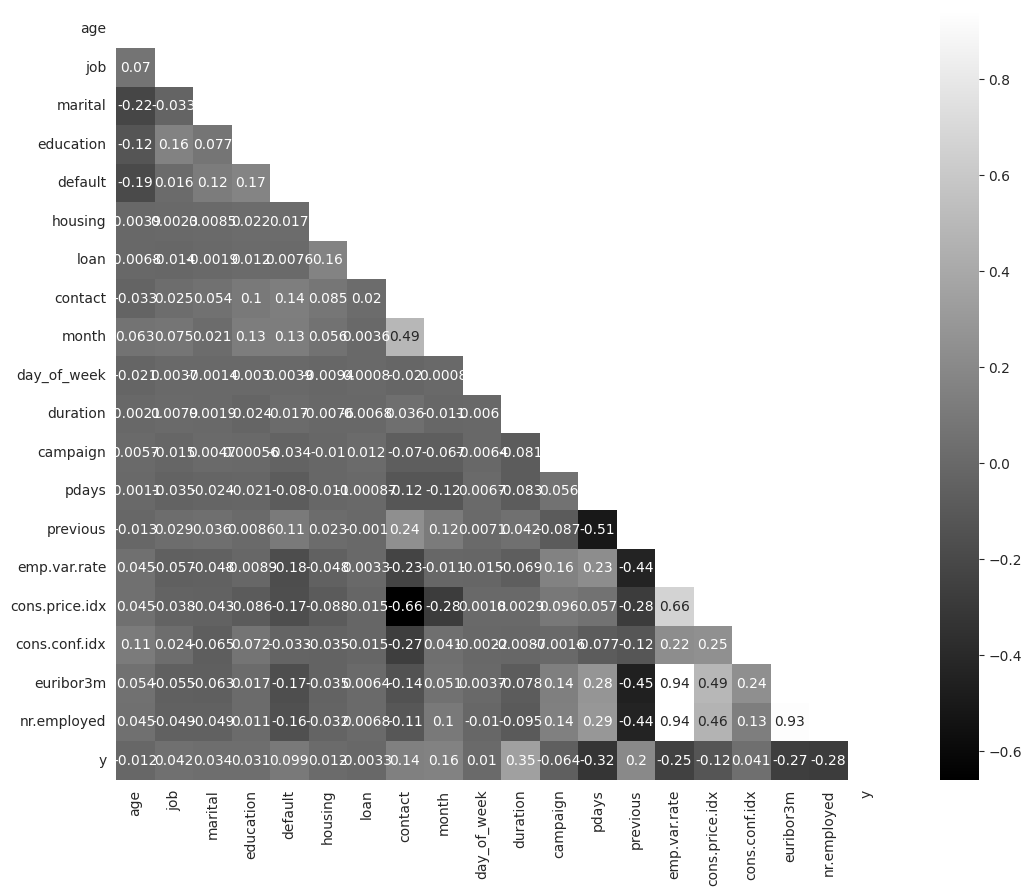

In [ ]:
#checamos correlacion, colinealidad, OPCION 2
corrMatrix = df.corr(method='spearman')
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(corrMatrix, mask=mask, square=True, annot=True, cmap="gray")

In [ ]:
#chequemos tabla 1
mytable = TableOne(df,categorical=cat, nonnormal=nonormal, groupby='y', pval=True)

In [ ]:
mytable

Grouped by y                                                                                
                                       Missing                 Overall                       0                       1 P-Value
n                                                                41188                   36548                    4640        
age, median [Q1,Q3]                          0        38.0 [32.0,47.0]        38.0 [32.0,47.0]        37.0 [31.0,50.0]   0.016
job, n (%)                     -1                            330 (0.8)               293 (0.8)                37 (0.8)  <0.001
                               0                            1060 (2.6)               954 (2.6)               106 (2.3)        
                               1                            3969 (9.6)             3646 (10.0)               323 (7.0)        
                               10                            875 (2.1)               600 (1.6)               275 (5.9)        
                               2                          10422 (25.3)             9070 (24.8)             1352 (29.1)        
                               3                           9254 (22.5)             8616 (23.6)              638 (13.8)        
                               4                           6743 (16.4)             6013 (16.5)              730 (15.7)        
                               5                            1720 (4.2)              1286 (3.5)               434 (9.4)        
                               6                            2924 (7.1)              2596 (7.1)               328 (7.1)        
                               7                            1014 (2.5)               870 (2.4)               144 (3.1)        
                               8                            1421 (3.5)              1272 (3.5)               149 (3.2)        
                               9                            1456 (3.5)              1332 (3.6)               124 (2.7)        
marital, n (%)                 -1                             80 (0.2)                68 (0.2)                12 (0.3)  <0.001
                               0                          24928 (60.5)            22396 (61.3)             2532 (54.6)        
                               1                          11568 (28.1)             9948 (27.2)             1620 (34.9)        
                               2                           4612 (11.2)             4136 (11.3)              476 (10.3)        
education, n (%)               -1                           1731 (4.2)              1480 (4.0)               251 (5.4)  <0.001
                               0                           4176 (10.1)             3748 (10.3)               428 (9.2)        
                               1                           9515 (23.1)             8484 (23.2)             1031 (22.2)        
                               2                            2292 (5.6)              2104 (5.8)               188 (4.1)        
                               3                           6045 (14.7)             5572 (15.2)              473 (10.2)        
                               4                           5243 (12.7)             4648 (12.7)              595 (12.8)        
                               5                          12168 (29.5)            10498 (28.7)             1670 (36.0)        
                               6                              18 (0.0)                14 (0.0)                 4 (0.1)        
default, n (%)                 -1                          8597 (20.9)             8154 (22.3)               443 (9.5)  <0.001
                               0                          32588 (79.1)            28391 (77.7)             4197 (90.5)        
                               1                               3 (0.0)                 3 (0.0)                                
housing, n (%)                 -1                            990 (2.4)               883 (2.4)   

In [ ]:
#imprimirla completa
print(mytable.tabulate(tablefmt = "fancy_grid"))

╒════════════════════════════════╤════╤═══════════╤════════════════════════╤════════════════════════╤════════════════════════╤═══════════╕
│                                │    │ Missing   │ Overall                │ 0                      │ 1                      │ P-Value   │
╞════════════════════════════════╪════╪═══════════╪════════════════════════╪════════════════════════╪════════════════════════╪═══════════╡
│ n                              │    │           │ 41188                  │ 36548                  │ 4640                   │           │
├────────────────────────────────┼────┼───────────┼────────────────────────┼────────────────────────┼────────────────────────┼───────────┤
│ age, median [Q1,Q3]            │    │ 0         │ 38.0 [32.0,47.0]       │ 38.0 [32.0,47.0]       │ 37.0 [31.0,50.0]       │ 0.016     │
├────────────────────────────────┼────┼───────────┼────────────────────────┼────────────────────────┼────────────────────────┼───────────┤
│ job, n (%)               

vemos que las viariables que infieren sobre y son: "age", "job", "marital", "education", "default", "contact", "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"

In [ ]:
#solo guardamos variable de interes arregladas
df = df[["age", "job", "marital", "education", "default", "contact", "month", "day_of_week", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed","y"]]

In [ ]:
df

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,-1,0,0,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,0,0,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,0,0,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,0,1,5,4,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,0,4,0,1,5,4,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,0,5,0,1,5,4,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,0,4,0,1,5,4,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


## Paso 3: Construye un modelo de regresión logística

In [ ]:
# Separamos las predictoras de la etiqueta
X = df.loc[ : , df.columns != 'y']
y = df[['y']]

# Dividimos la muestra en train y test al 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 666, stratify=y)

In [ ]:
#definimos y entrenamos el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#sacamos nuestras prediciones
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#accuracy
accuracy_score(y_test, y_pred)

0.9102937606215101

In [ ]:
#matriz de confusion
print(classification_report(y_test, y_pred))  #exelente!

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.67      0.40      0.50       928

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



## Paso 4: Optimiza el modelo anterior

**OPCION 1**

In [ ]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#grid.fit(X_train, y_train)

#print(f"Mejores hiperparámetros: {grid.best_params_}")

In [ ]:
model_grid = LogisticRegression(penalty = "l2", C = 1, solver = "newton-cg") #usamos los mejores hyperparametros
model_grid.fit(X_train, y_train) #entrenamos
y_pred2 = model_grid.predict(X_test) #sacamos preds2

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:44: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


In [ ]:
#accuracy del modelo 2
accuracy_score(y_test, y_pred2)

0.9099295945617868

In [ ]:
#matriz de confusion
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.67      0.40      0.50       928

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238



**OPCION 2**

In [ ]:
# Grid search hyperparameters para logistic regression model
def grid_lr(X_train, y_train):
    model = LogisticRegression(random_state=666, max_iter=1000)
    class_weight =  [{0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}]
    solvers = ['liblinear']
    penalty = ['l2','l1']
    c_values = [ 10, 1.0, 0.1, 0.01, 0.001, ]
    grid = dict(solver=solvers,penalty=penalty,C=c_values, class_weight= class_weight)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='f1',error_score='raise')
    grid_result = grid_search.fit(X_train, y_train)
    return  grid_result.best_estimator_

In [ ]:
##aplicamos regresion con los mejores parametros
best_model = grid_lr(X_train, y_train) #entreno el modelo con X_train y y_train
preds = best_model.predict(X_test)
print(classification_report(y_test, preds))  # recall igual a sensibilidad